<a href="https://colab.research.google.com/github/simranmahadik1199/data-sciences-statistics-/blob/master/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("train.csv")
print(df.head())

print ("data has {} samples and {} features".format(*df.shape) )


   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
data has 891 samples and 12 features


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


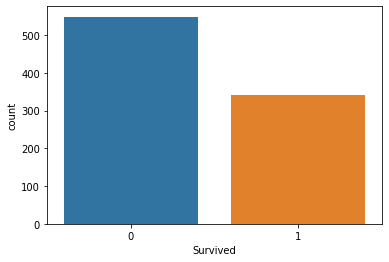

In [ ]:
df.head()
sns.countplot(df['Survived'])
plt.show()

In [ ]:
len(df['PassengerId'].unique())
#find unique id
len(df['Pclass'].unique())

3

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


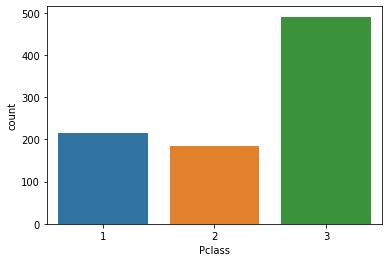

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
sns.countplot(df['Pclass'])
plt.show()
#find null values
df.isnull().sum()

In [ ]:
age_mean=df['Age'].mean()
df['Age']=df['Age'].fillna(age_mean)
#fill null values with mean

In [ ]:
df['has_cabin']=np.where(df['Cabin'].isnull(),0,1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
len(df['Embarked'].unique())

4

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


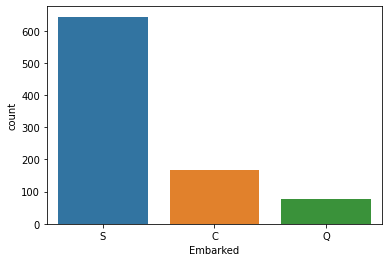

In [ ]:
sns.countplot(df['Embarked'])
plt.show()

In [ ]:

df=pd.get_dummies(df,columns=['Sex','Embarked'])

In [ ]:
pd.set_option('max_columns',None)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  has_cabin  Sex_female  Sex_male  \
0         A/5 21171   7.2500   NaN          0           0         1   
1          PC 17599  71.2833   C85          1           1         0   
2  STON/O2. 3101282   7.9250   NaN          0           1         0   
3            113803  53.1000  C123        

In [ ]:

df.drop(['PassengerId', 'Name', 'Ticket','Cabin'] ,axis=1,inplace=True)
print(df.head())
y=df['Survived']
df.drop(['Survived'],axis=1,inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=42)

#importing decision tree
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier(random_state=42)
dct.fit(X_train,y_train)
y_predictions=dct.predict(X_test)

#measuring accuracy
from sklearn.metrics import accuracy_score
accuracy_score=(y_test,y_predictions)



   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


ValueError: ignored